In [5]:
import pandas as pd
import sqlite3
import pandas.io.sql as sqlio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [ ]:
#%%time
#i=0
#while True:
   # try:
        #url = 'http://www.transparencia.gov.br/api-de-dados/cartoes?dataTransacaoInicio=01%2F01%2F2019&dataTransacaoFim=31%2F12%2F2019&pagina='+str(i+1)
        #temp = pd.read_json(url)
        #if i == 0:
            #fatura = pd.read_json(url)
        #else:
            #fatura =pd.concat([fatura,temp])
        #if i%1000==0: print('{} páginas lidas'.format(i))
        #i+=1
    #except:
         #break

#fatura['valorTransacao'] = fatura['valorTransacao'].str.replace(' ','').str.replace('.','').str.replace(',','.').astype(float)
#fatura.reset_index(drop=True,inplace=True)
#fatura[['id_cartao','codigo_cartao','descricao_cartao']] = fatura['tipoCartao'].apply(pd.Series)

In [6]:
db = sqlite3.connect("database.db")

In [7]:
df = pd.read_sql_query("SELECT * FROM database;",db)
df.shape

(23475, 32)

In [8]:
df.head()

,field1,id_x,mesExtrato,dataTransacao,valorTransacao,id_y,codigo_x,descricao,numeroInscricaoSocial,nome_x,...,numeroCEP,nomeBairro,codigoFormatado_x,tipoCodigo,tipoPessoa,codigo_y,nome_y,orgaoVinculado,codigoFormatado_y,nome
0,0,151023716,10/2019,18/09/2019,9.00,1,1,Cartão de Pagamento do Governo Federal - CPGF,None,ZOOP TECNOLOGIA E MEIOS DE PAGAMENTO S.A.,...,None,BARRA DA TIJUCA,19.468.242/0001-32,CNPJ,Entidades Empresariais Privadas,158461,IF CATARINENSE - CAMPUS CONCÓRDIA,"{'nome': 'Instituto Federal Catarinense', 'cod...",***.857.959-**,HORALDO ANTONIO BRANDALISE
1,1,151023717,09/2019,02/08/2019,20.00,1,1,Cartão de Pagamento do Governo Federal - CPGF,-1,SEM INFORMACAO,...,None,None,-1,None,Sem Informação,170160,DELEGACIA DA RFB EM PONTA GROSSA,{'nome': 'Ministério da Economia - Unidades co...,***.646.795-**,JOAO VICTOR BARBOSA DE MATOS
2,2,151023718,04/2019,19/03/2019,609.38,1,1,Cartão de Pagamento do Governo Federal - CPGF,None,M. L. COMERCIO E INDUSTRIA DE ALUMINIO LTDA,...,None,IBIRAPUERA,20.067.580/0001-41,CNPJ,Entidades Empresariais Privadas,153038,UNIVERSIDADE FEDERAL DA BAHIA,"{'nome': 'Universidade Federal da Bahia', 'cod...",***.483.205-**,ANTONIO CARLOS SAMPAIO AMARAL
3,3,151023719,08/2019,09/07/2019,389.60,1,1,Cartão de Pagamento do Governo Federal - CPGF,-1,SEM INFORMACAO,...,None,None,-1,None,Sem Informação,155001,HOSPITAL DE CLINICAS DE PORTO ALEGRE,{'nome': 'Hospital de Clínicas de Porto Alegre...,***.877.890-**,ALROUCIAN SANTOS DA MOTTA
4,4,151023720,04/2019,13/03/2019,14.99,1,1,Cartão de Pagamento do Governo Federal - CPGF,None,ATACADO DA CONSTRUCAO LTDA,...,None,PINA,35.519.545/0001-93,CNPJ,Entidades Empresariais Privadas,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,{'nome': 'Advocacia-Geral da União - Unidades ...,***.449.134-**,SENISE LIRA MONTENEGRO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23475 entries, 0 to 23474
Data columns (total 32 columns):
field1                   23475 non-null int64
id_x                     23475 non-null int64
mesExtrato               23475 non-null object
dataTransacao            23475 non-null object
valorTransacao           23475 non-null float64
id_y                     23475 non-null int64
codigo_x                 23475 non-null int64
descricao                23475 non-null object
numeroInscricaoSocial    3038 non-null object
nome_x                   23475 non-null object
razaoSocialReceita       22114 non-null object
nomeFantasiaReceita      12152 non-null object
cnae                     23475 non-null object
municipio                23475 non-null object
localidadePessoa         23475 non-null object
naturezaJuridica         23475 non-null object
dataAbertura             23475 non-null object
enderecoEletronico       16097 non-null object
numeroTelefone           17851 non-null object
de

In [10]:
df["mesExtrato"].value_counts()

08/2019    4874
06/2019    4751
07/2019    4293
05/2019    2707
11/2019    1373
10/2019    1303
09/2019    1233
12/2019    1221
04/2019     815
03/2019     728
02/2019     177
Name: mesExtrato, dtype: int64

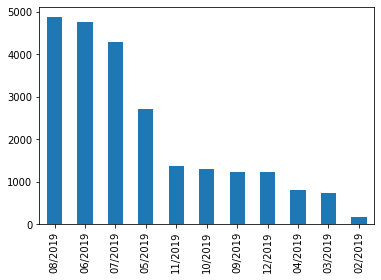

In [11]:
df["mesExtrato"].value_counts().plot(kind='bar')

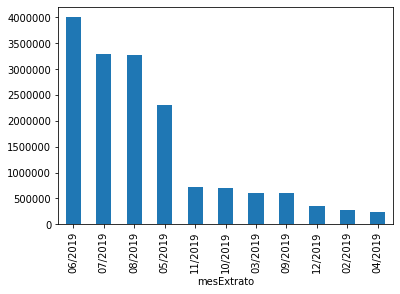

In [12]:
df.groupby(["mesExtrato"])["valorTransacao"].sum().sort_values(ascending =False).plot(kind="bar")

In [13]:
df.groupby(["nome"])["valorTransacao"].value_counts().sort_values(ascending =False)

nome                        valorTransacao
RUI SOARES PALMEIRA          1000.00          974
                            -1000.00           63
NAO SE APLICA                1113.36           39
                             1775.39           29
                             1701.67           29
                                             ... 
                             771.82             1
                             771.75             1
                             771.59             1
                             771.54             1
ABELARDO FLORIANO DE PAULO   180.00             1
Name: valorTransacao, Length: 16075, dtype: int64

In [14]:
df.groupby(["nome"])["valorTransacao"].sum().sort_values(ascending =False)

nome
NAO SE APLICA                      10441924.87
RUI SOARES PALMEIRA                  911500.00
ALISSON CESAR MONTEIRO               457246.30
JOSE DA SILVA LIMA                   338016.00
ULISSES PEREIRA NUNES FILHO          255143.81
                                      ...     
MARCOS ANTONIO CRUZ RAMOS                 5.00
JOAO GONCALVES FILHO                      5.00
PAULO HENRIQUE DE SOUZA PIGATTI           4.00
TOMAZ AUGUSTO GOULART LUCARINI            1.00
LEILA RAQUEL POSSIMOSER BRANDAO           0.85
Name: valorTransacao, Length: 3012, dtype: float64

In [15]:
df1 = df.groupby('nome').agg({'valorTransacao':'sum'})

In [16]:
df1 = df1.reset_index()
df1.head()

,nome,valorTransacao
0,ABELARDO FLORIANO DE PAULO,180.00
1,ADAILSON ROSA DE OLIVEIRA,212.02
2,ADALBERTO DOS SANTOS,1230.00
3,ADALBERTO MIRANDA JARDIM,250.00
4,ADALTIVO FARIAS SIQUARA FILHO,1998.00


In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
valorTransacao,3012.0,5441.252712,191406.534936,0.85,186.61,478.535,1079.2875,10441924.87


In [18]:
df1_maior_200k = df1[df1['valorTransacao'] >= 200000]
df1_maior_200k.head()

,nome,valorTransacao
156,ALISSON CESAR MONTEIRO,457246.30
1548,JOSE DA SILVA LIMA,338016.00
1599,JOSE MARCILIO GUIMARAES CAVALCANTE,216019.00
2253,NAO SE APLICA,10441924.87
2652,RUI SOARES PALMEIRA,911500.00


In [19]:
df1_maior_200k= df1_maior_200k.drop(2253)

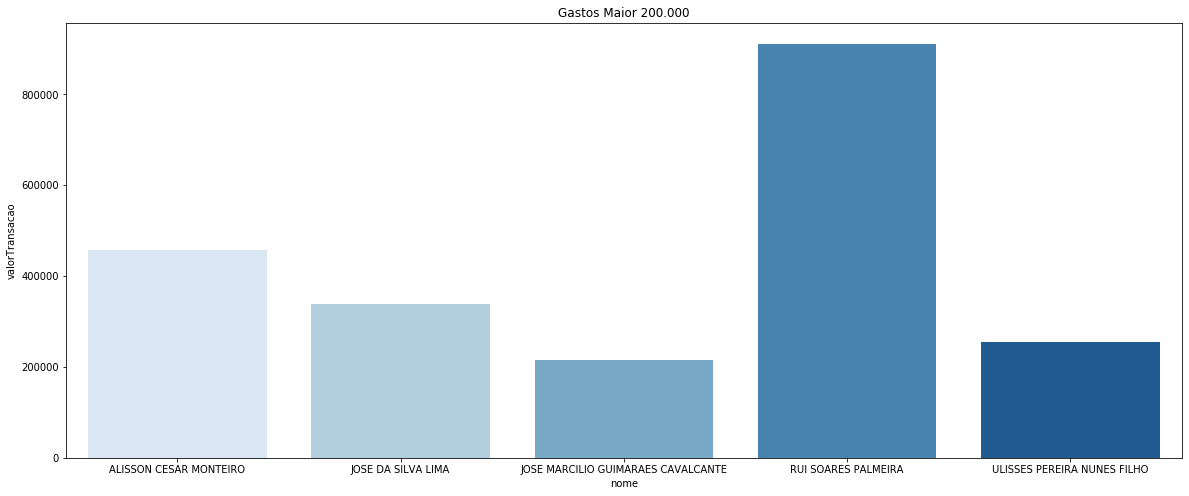

In [20]:
plt.figure(figsize=(20,8))
plt.title("Gastos Maior 200.000")
sns.barplot(x="nome", y="valorTransacao", data=df1_maior_200k, palette='Blues');

In [21]:
df.groupby(["nome"])["valorTransacao"].value_counts().sort_values(ascending =False)

nome                        valorTransacao
RUI SOARES PALMEIRA          1000.00          974
                            -1000.00           63
NAO SE APLICA                1113.36           39
                             1775.39           29
                             1701.67           29
                                             ... 
                             771.82             1
                             771.75             1
                             771.59             1
                             771.54             1
ABELARDO FLORIANO DE PAULO   180.00             1
Name: valorTransacao, Length: 16075, dtype: int64

In [22]:
df2 = df.groupby('nome').agg({'valorTransacao':'value_counts'})

In [23]:
df2.head()

valorTransacao
nome                       valorTransacao                
ABELARDO FLORIANO DE PAULO 180.00                       1
ADAILSON ROSA DE OLIVEIRA  212.02                       1
ADALBERTO DOS SANTOS       430.00                       1
                           800.00                       1
ADALBERTO MIRANDA JARDIM   100.00                       1

In [24]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
valorTransacao,16075.0,1.460342,7.830311,1.0,1.0,1.0,1.0,974.0


In [25]:
df2_maior_100 = df2[df2['valorTransacao'] >= 50]
df2_maior_100.head()

valorTransacao
nome                valorTransacao                
RUI SOARES PALMEIRA  1000.0                    974
                    -1000.0                     63

In [26]:
df2_maior_100.shape

(2, 1)

In [41]:
df_Rui= df[["nome","nome_x","razaoSocialReceita","mesExtrato","dataTransacao", "valorTransacao","municipio","orgaoVinculado","codigoFormatado_x"]].copy()
df_Rui.head()

,nome,nome_x,razaoSocialReceita,mesExtrato,dataTransacao,valorTransacao,municipio,orgaoVinculado,codigoFormatado_x
0,HORALDO ANTONIO BRANDALISE,ZOOP TECNOLOGIA E MEIOS DE PAGAMENTO S.A.,ZOOP TECNOLOGIA E MEIOS DE PAGAMENTO S.A.,10/2019,18/09/2019,9.00,"{'codigoIBGE': '3304557', 'nomeIBGE': 'RIO DE ...","{'nome': 'Instituto Federal Catarinense', 'cod...",19.468.242/0001-32
1,JOAO VICTOR BARBOSA DE MATOS,SEM INFORMACAO,Sem informação,09/2019,02/08/2019,20.00,"{'codigoIBGE': '-1', 'nomeIBGE': 'Sem Informaç...",{'nome': 'Ministério da Economia - Unidades co...,-1
2,ANTONIO CARLOS SAMPAIO AMARAL,M. L. COMERCIO E INDUSTRIA DE ALUMINIO LTDA,M. L. COMERCIO E INDUSTRIA DE ALUMINIO LTDA,04/2019,19/03/2019,609.38,"{'codigoIBGE': '2933307', 'nomeIBGE': 'VITÓRIA...","{'nome': 'Universidade Federal da Bahia', 'cod...",20.067.580/0001-41
3,ALROUCIAN SANTOS DA MOTTA,SEM INFORMACAO,Sem informação,08/2019,09/07/2019,389.60,"{'codigoIBGE': '-1', 'nomeIBGE': 'Sem Informaç...",{'nome': 'Hospital de Clínicas de Porto Alegre...,-1
4,SENISE LIRA MONTENEGRO,ATACADO DA CONSTRUCAO LTDA,ATACADO DA CONSTRUCAO LTDA,04/2019,13/03/2019,14.99,"{'codigoIBGE': '2611606', 'nomeIBGE': 'RECIFE'...",{'nome': 'Advocacia-Geral da União - Unidades ...,35.519.545/0001-93


In [42]:
df_Rui.groupby(["nome"])["valorTransacao"].value_counts().sort_values(ascending =False)

nome                        valorTransacao
RUI SOARES PALMEIRA          1000.00          974
                            -1000.00           63
NAO SE APLICA                1113.36           39
                             1775.39           29
                             1701.67           29
                                             ... 
                             771.82             1
                             771.75             1
                             771.59             1
                             771.54             1
ABELARDO FLORIANO DE PAULO   180.00             1
Name: valorTransacao, Length: 16075, dtype: int64

In [43]:
df_Rui["nome"] = df_Rui["nome"].astype(str)

In [44]:
df_Rui["nome"] = df_Rui["nome"].str.replace('/',' ')

In [45]:
df_Rui["nome"]= df_Rui["nome"].str.replace(" ", "_")

In [46]:
df_Rui.head()

,nome,nome_x,razaoSocialReceita,mesExtrato,dataTransacao,valorTransacao,municipio,orgaoVinculado,codigoFormatado_x
0,HORALDO_ANTONIO_BRANDALISE,ZOOP TECNOLOGIA E MEIOS DE PAGAMENTO S.A.,ZOOP TECNOLOGIA E MEIOS DE PAGAMENTO S.A.,10/2019,18/09/2019,9.00,"{'codigoIBGE': '3304557', 'nomeIBGE': 'RIO DE ...","{'nome': 'Instituto Federal Catarinense', 'cod...",19.468.242/0001-32
1,JOAO_VICTOR_BARBOSA_DE_MATOS,SEM INFORMACAO,Sem informação,09/2019,02/08/2019,20.00,"{'codigoIBGE': '-1', 'nomeIBGE': 'Sem Informaç...",{'nome': 'Ministério da Economia - Unidades co...,-1
2,ANTONIO_CARLOS_SAMPAIO_AMARAL,M. L. COMERCIO E INDUSTRIA DE ALUMINIO LTDA,M. L. COMERCIO E INDUSTRIA DE ALUMINIO LTDA,04/2019,19/03/2019,609.38,"{'codigoIBGE': '2933307', 'nomeIBGE': 'VITÓRIA...","{'nome': 'Universidade Federal da Bahia', 'cod...",20.067.580/0001-41
3,ALROUCIAN_SANTOS_DA_MOTTA,SEM INFORMACAO,Sem informação,08/2019,09/07/2019,389.60,"{'codigoIBGE': '-1', 'nomeIBGE': 'Sem Informaç...",{'nome': 'Hospital de Clínicas de Porto Alegre...,-1
4,SENISE_LIRA_MONTENEGRO,ATACADO DA CONSTRUCAO LTDA,ATACADO DA CONSTRUCAO LTDA,04/2019,13/03/2019,14.99,"{'codigoIBGE': '2611606', 'nomeIBGE': 'RECIFE'...",{'nome': 'Advocacia-Geral da União - Unidades ...,35.519.545/0001-93


In [47]:
df_Rui["nome"]= df_Rui.loc[df_Rui["nome"] == 'RUI_SOARES_PALMEIRA']

In [48]:
df_Rui_modificado= df_Rui[["nome","nome_x","razaoSocialReceita","mesExtrato","dataTransacao", "valorTransacao","municipio","orgaoVinculado","codigoFormatado_x"]].copy()
df_Rui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23475 entries, 0 to 23474
Data columns (total 9 columns):
nome                  1038 non-null object
nome_x                23475 non-null object
razaoSocialReceita    22114 non-null object
mesExtrato            23475 non-null object
dataTransacao         23475 non-null object
valorTransacao        23475 non-null float64
municipio             23475 non-null object
orgaoVinculado        23475 non-null object
codigoFormatado_x     23475 non-null object
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


In [49]:
df_Rui_modificado= df_Rui_modificado.dropna(subset=["nome"])

In [50]:
df_Rui_modificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 1425 to 23440
Data columns (total 9 columns):
nome                  1038 non-null object
nome_x                1038 non-null object
razaoSocialReceita    1 non-null object
mesExtrato            1038 non-null object
dataTransacao         1038 non-null object
valorTransacao        1038 non-null float64
municipio             1038 non-null object
orgaoVinculado        1038 non-null object
codigoFormatado_x     1038 non-null object
dtypes: float64(1), object(8)
memory usage: 81.1+ KB


In [51]:
df_Rui_modificado.head()

,nome,nome_x,razaoSocialReceita,mesExtrato,dataTransacao,valorTransacao,municipio,orgaoVinculado,codigoFormatado_x
1425,RUI_SOARES_PALMEIRA,POLLANY CAVALCANTE FERREIRA,None,11/2019,23/10/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.336.684-**
1426,RUI_SOARES_PALMEIRA,ADRIANO OMENA DE MELO,None,11/2019,08/10/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.188.604-**
1427,RUI_SOARES_PALMEIRA,MARLUCE NASCIMENTO DA SILVA MELO,None,09/2019,22/08/2019,-1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.195.744-**
1428,RUI_SOARES_PALMEIRA,FABIO DAS CHAGAS MOTA,None,10/2019,09/09/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.402.414-**
1429,RUI_SOARES_PALMEIRA,NEUZA MAMEDE DE SOUZA,None,10/2019,20/09/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.325.504-**


In [64]:
df_Rui_modificado['orgaoVinculado'][1425]

"{'nome': 'Ministério do Desenvolvimento Regional - Unidades com vínculo direto', 'codigoSIAFI': '53000', 'cnpj': '03353358000196', 'sigla': 'INTEGRAÇÃO', 'descricaoPoder': 'EXECUTIVO', 'orgaoMaximo': {'codigo': '53000', 'sigla': 'INTEGRAÇÃO', 'nome': 'Ministério do Desenvolvimento Regional'}}"

In [66]:
df_Rui_modificado['valorTransacao'].value_counts()

 1000.0    974
-1000.0     63
 500.0       1
Name: valorTransacao, dtype: int64

In [54]:
df_Rui_modificado.groupby(["nome_x"])["valorTransacao"].value_counts().sort_values(ascending= True)

nome_x                              valorTransacao
ABDON ALMEIDA MOREIRA               1000.0            1
MARIA DA CONCEICAO FIGUEIREDO LIMA  1000.0            1
MARIA DA PENHA DINIZ                1000.0            1
MARIA DA PIEDADE DE MELO            1000.0            1
MARIA DAS GRACAS DE SA              1000.0            1
                                                     ..
JULIO CESAR PERMINIO TENORIO        1000.0            4
SANDRA RIOS GONZAGA                 1000.0            4
RITA OLIVEIRA CAVALCANTE            1000.0            4
VLADIMIR DE LIMA FONTES             1000.0            4
EDSON ALENCAR SOBRINHO              1000.0            4
Name: valorTransacao, Length: 860, dtype: int64

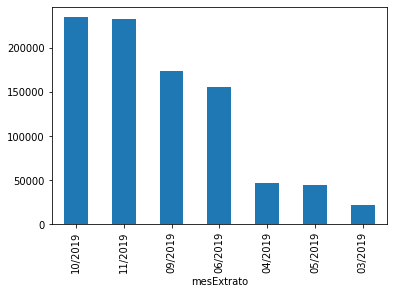

In [306]:
df_Rui_modificado.groupby(["mesExtrato"])["valorTransacao"].sum().sort_values(ascending =False).plot(kind="bar")

In [333]:
df_Rui_modificado.groupby(["year", "month", "day"])["valorTransacao"].sum()

year  month  day
2019  1      3      16000.0
             8       3000.0
             10      3000.0
             30      7000.0
      2      9      -1000.0
             20     16000.0
             21     -1000.0
      3      21     14000.0
             22      4000.0
             25      7000.0
             28     10000.0
             29     -1000.0
      4      10     22500.0
             17     24000.0
             30     31000.0
      5      4      12000.0
             8      19000.0
             9      10000.0
             13     53000.0
             17     23000.0
             20      9000.0
             21     -1000.0
             22      1000.0
             23     40000.0
      6      8      -9000.0
             9      -6000.0
      7      10      6000.0
             29     -2000.0
             30     -2000.0
      8      3       6000.0
             10     83000.0
             19     14000.0
             22     -7000.0
             23     42000.0
             30     -4000.0
   

In [320]:
df_Rui_modificado["datetime"] = pd.to_datetime(df_Rui_modificado["dataTransacao"])

In [331]:
df_Rui_modificado["month"] = df_Rui_modificado["datetime"].dt.month
df_Rui_modificado["year"] = df_Rui_modificado["datetime"].dt.year
df_Rui_modificado["day"] = df_Rui_modificado["datetime"].dt.day
df_Rui_modificado.head()

,nome,razaoSocialReceita,mesExtrato,dataTransacao,valorTransacao,municipio,orgaoVinculado,codigoFormatado_x,datetime,year,month,day
1425,RUI_SOARES_PALMEIRA,None,11/2019,23/10/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.336.684-**,2019-10-23,2019,10,23
1426,RUI_SOARES_PALMEIRA,None,11/2019,08/10/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.188.604-**,2019-08-10,2019,8,10
1427,RUI_SOARES_PALMEIRA,None,09/2019,22/08/2019,-1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.195.744-**,2019-08-22,2019,8,22
1428,RUI_SOARES_PALMEIRA,None,10/2019,09/09/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.402.414-**,2019-09-09,2019,9,9
1429,RUI_SOARES_PALMEIRA,None,10/2019,20/09/2019,1000.0,"{'codigoIBGE': '2704302', 'nomeIBGE': 'MACEIÓ'...",{'nome': 'Ministério do Desenvolvimento Region...,***.325.504-**,2019-09-20,2019,9,20


In [315]:
df_Rui_modificado["codigoFormatado_x"].value_counts().sort_values(ascending =False)

***.960.384-**    4
***.434.784-**    4
***.711.224-**    4
***.365.874-**    4
***.358.814-**    4
                 ..
***.180.604-**    1
***.697.554-**    1
***.861.904-**    1
***.976.214-**    1
***.421.824-**    1
Name: codigoFormatado_x, Length: 837, dtype: int64

In [318]:
df_Rui_modificado["razaoSocialReceita"].count()

1

In [ ]:
#df["nome"]=df["nome"].replace('NA','0')

#df.groupby(["nome"])["valorTransacao"].sum().sort_values(ascending =False)

#dá para fazer um FOR para cada valor alto: df.groupby("nome")["valorTransacao"].sum()[0]